In [6]:
import os
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Load preprocessed data
preprocessing_objects = joblib.load("../outputs/preprocessing_all.pkl")

df_final_encoded = preprocessing_objects["data"]
binary_encoder = preprocessing_objects["binary_encoder"]
multi_encoder = preprocessing_objects["multi_encoder"]

print("Preprocessed data loaded successfully!")

# Load model training data with feature selection
training_data = joblib.load("../outputs/model_training_data_with_features.pkl")

X_final = training_data["X_final"]  # Only feature-selected columns
y = training_data["y"]              # Target variable

print("Feature-selected data loaded successfully!")
print("Selected features:", X_final.columns.tolist())

Preprocessed data loaded successfully!
Feature-selected data loaded successfully!
Selected features: ['Mental_Health_Score', 'Sleep_Hours_Per_Night', 'Avg_Daily_Usage_Hours', 'Affects_Academic_Performance_Yes']


In [8]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)
# Initialize Linear Regression
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"MSE: {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

Linear Regression Results:
MSE: 0.1453
RMSE: 0.3812
R² Score: 0.9419


**Coode Explination**
- The model is initialized with `LinearRegression()`, which assumes a **linear relationship** between features and target.
- The model **learns patterns** from the training data (`X_train`, `y_train`).
- After training, it predicts addiction scores for the **unseen test data** (`X_test`).
- `y_pred_lr` is an array of predicted values for each test sample.
- **MSE (Mean Squared Error):** Average squared difference between actual and predicted values.
- **RMSE (Root Mean Squared Error):** Square root of MSE, giving error in the same scale as the target.
- **R² Score (Coefficient of Determination):** Measures how well the model explains variance in the target.
    - R² = 1 → perfect prediction
    - R² = 0 → model cannot explain variance

**Output Explination**
- **MSE = 0.1453** → On average, the **squared error** between predicted and actual addiction scores is 0.1453.
- **RMSE = 0.3812** → On average, predictions are off by about **0.38 points** from the true addiction score.
- **R² = 0.9419** → The model explains **94.2% of the variance** in addiction scores.

✅ **Interpretation:**

- Linear Regression is **reasonably accurate**, but not as precise as Gradient Boosting or Random Forest.
- Since it assumes a **linear relationship**, it can’t capture complex patterns perfectly, which is why RMSE is higher and R² slightly lower compared to ensemble models.

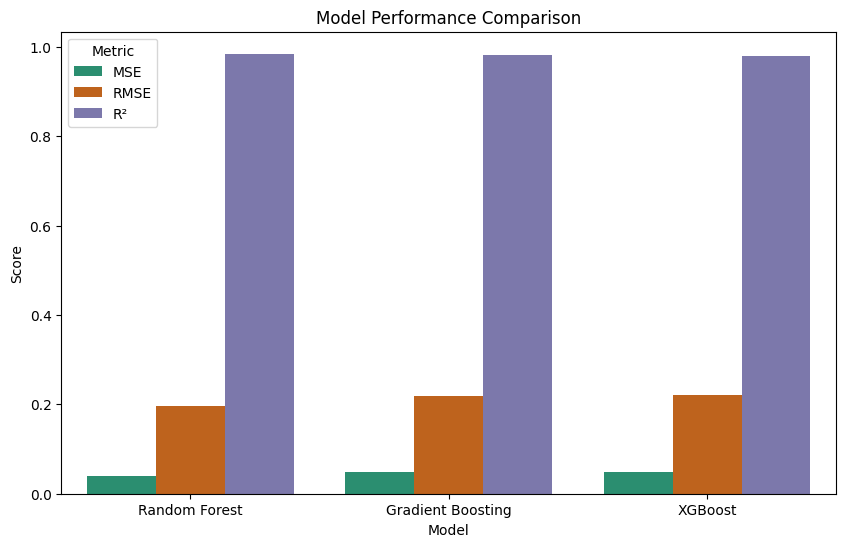

In [9]:
# Prepare data in long format for Seaborn
data = {
    "Model": ["Random Forest", "Gradient Boosting", "XGBoost"] * 3,
    "Metric": ["MSE"]*3 + ["RMSE"]*3 + ["R²"]*3,
    "Value": [0.0388, 0.0480, 0.0493, 0.1969, 0.2191, 0.2219, 0.9846, 0.9808, 0.9803]
}

df_plot = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Value", hue="Metric", data=df_plot, palette="Dark2")

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

## Output Comparison
- **Gradient Boosting vs XGBoost**
    - Both are boosting methods, so their results are very close.
    - Gradient Boosting slightly **better MSE/RMSE and R²** in my case, meaning it predicts slightly more accurately.
- **Linear Regression**
    - Much higher MSE and RMSE → predictions are **less precise**.
    - Lower R² → explains slightly less variance in addiction scores.
    - This is expected because it assumes a **linear relationship**, which may not capture all patterns in your dataset.
- **Overall**
    - **Gradient Boosting** → best performance.
    - **XGBoost** → very close, also excellent.
    - **Linear Regression** → okay, but less accurate for this complex data.